In [104]:
import pandas as pd
import numpy as np


customer_offers = pd.read_csv('customer_offers.csv')
customer_offers = customer_offers.set_index('customer_name')

## 使用K-means来进行分类

In [105]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=3, random_state=10)
cluster = model.fit_predict(customer_offers)
offer_cols = customer_offers.columns
customer_offers['cluster'] = cluster
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## 调用PCA

In [106]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2,random_state=10)
customer_offers['pc1'], customer_offers['pc2'] = zip(*pca.fit_transform(customer_offers[offer_cols]))
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,cluster,pc1,pc2
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1.007580,0.108215
Allen,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,-0.287539,0.044715
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,-0.392032,1.038391
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0.699477,-0.022542
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0.088183,-0.471695


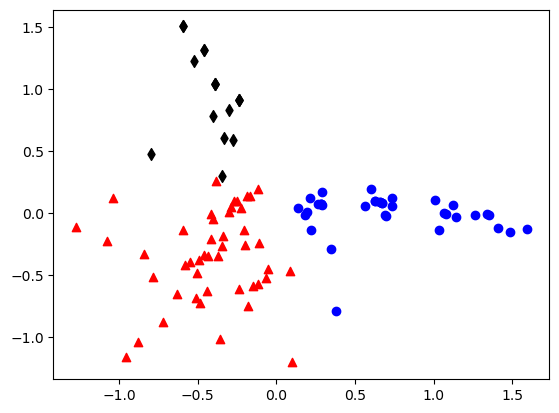

In [107]:

#用matplotlib来展示散点图，基于pc1和pc2的二维平面
colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in customer_offers['cluster'].unique():
    d = customer_offers[customer_offers['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])
 

plt.show()

## 计算每组的平均数与总体平均数的差，并以bar图形式显示

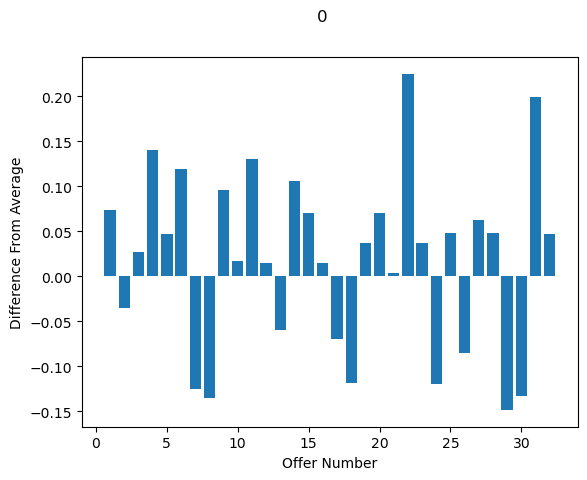

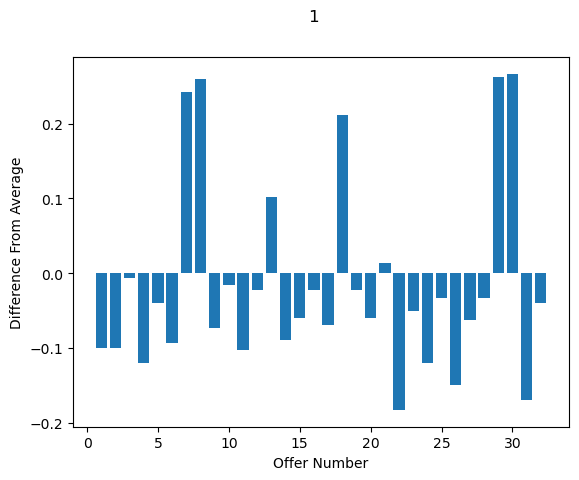

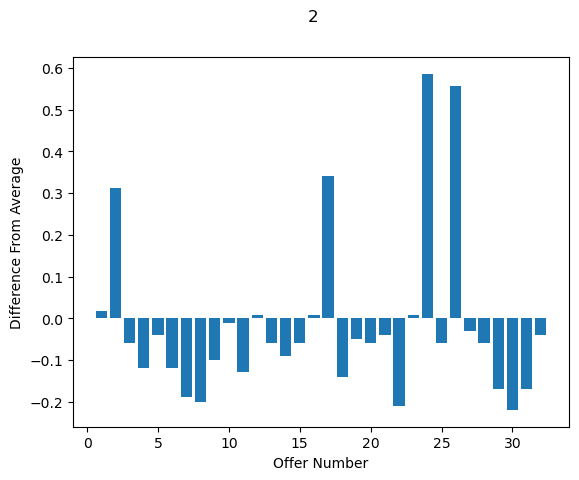

In [114]:
#计算总体平均数
total_proportions = customer_offers[offer_cols].mean()

#遍历三组数据，这里range（3）可以替代为customer_offers['cluster'].unique
for i in range(3):
    plt.figure(i)  #设置三张图
    cluster_df = customer_offers[customer_offers['cluster'] == i]  #与当前cluster相同值的数据，另存一份到cluster_df
    cluster_proportions = cluster_df[offer_cols].mean()  #计算这部另存数据的平均数，基于1-32列

    diff = cluster_proportions - total_proportions  #计算与总体的差
    plt.bar(range(1, 33), diff)  #横坐标1-33，h为差值
    plt.xlabel('Offer Number')  #标记横坐标轴名称
    plt.ylabel('Difference From Average')  #标记纵坐标轴名称
    plt.suptitle(i)  #设置图片名称，显示cluster分组
plt.show()

In [134]:
offer_info=pd.read_csv('offer_info.csv')
offer_info=offer_info.set_index('offer_id')
offer_info.head()

,varietal
offer_id,
1,Malbec
2,Pinot Noir
3,Espumante
4,Champagne
5,Cabernet Sauvignon


In [136]:
#针对每组数据，找到其前五的数据，并匹配offer_info的id，输出其对应的葡萄品种
for i in range(3):
    cluster_df = customer_offers[customer_offers['cluster'] == i]
    cluster_proportions = cluster_df[offer_cols].mean()

    diff = cluster_proportions - total_proportions
    cluster_rep_offers = list(diff.sort_values(ascending=False).index.astype(int)[0:5])  #对diff从大到小排序，获取value前5的index，存入cluster_rep_offers
    print(offer_info.loc[offer_info.index.isin(cluster_rep_offers),'varietal'])  #在offer_info中找到index满足cluster_rep_offers的数据，输出其varietal的值

offer_id
4     Champagne
6      Prosecco
11    Champagne
22    Champagne
31    Champagne
Name: varietal, dtype: object
offer_id
7         Prosecco
8        Espumante
18       Espumante
29    Pinot Grigio
30          Malbec
Name: varietal, dtype: object
offer_id
1         Malbec
2     Pinot Noir
17    Pinot Noir
24    Pinot Noir
26    Pinot Noir
Name: varietal, dtype: object
